In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

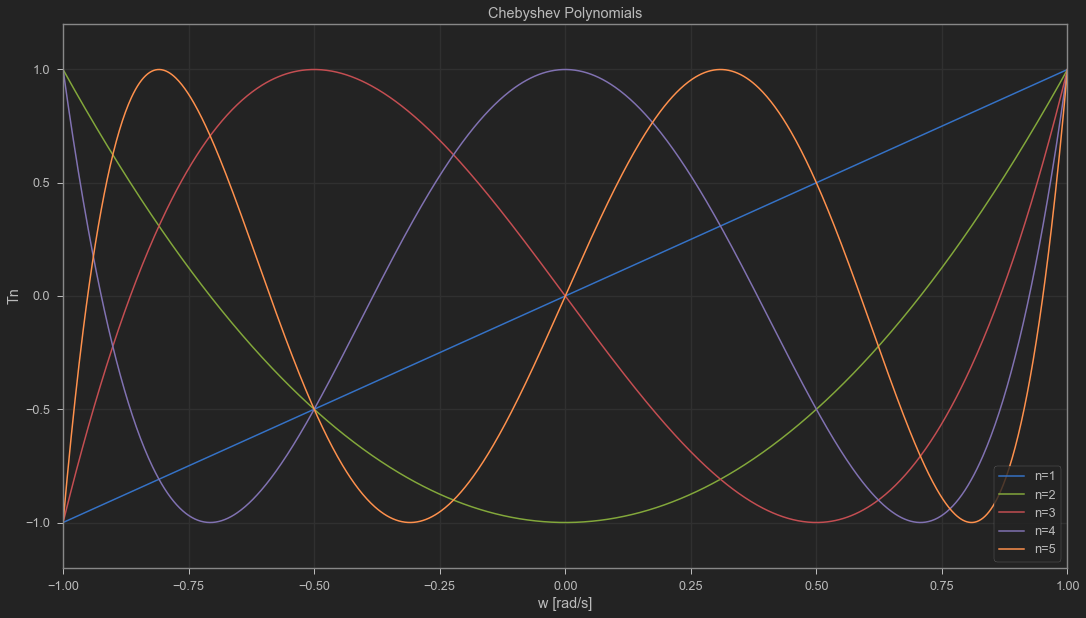

In [2]:
# Tn or Chebyshev Polynomials
def chebyT(n, w):
    if n == 0:
        return 1
    elif n == 1:
        return w
    else:
        return 2*w*chebyT(n-1, w) - chebyT(n-2, w)

w1 = np.linspace(-1, 1, 1000)
plt.figure(1, figsize=(18,10))
for i in np.arange(1,6):
    plt.plot(w1, chebyT(i, w1), label='n={}'.format(i))
plt.margins(0, 0.1)
plt.legend()
plt.title('Chebyshev Polynomials')
plt.xlabel('w [rad/s]')
plt.ylabel('Tn')
plt.grid(which='both', axis='both')
plt.show(plt.figure(1))

n = 1
[1.96522673]
[1.         1.96522673]


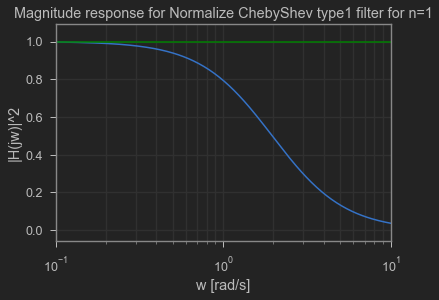

<Figure size 432x288 with 0 Axes>

n = 2
[0.98261336]
[1.         1.09773433 1.10251033]


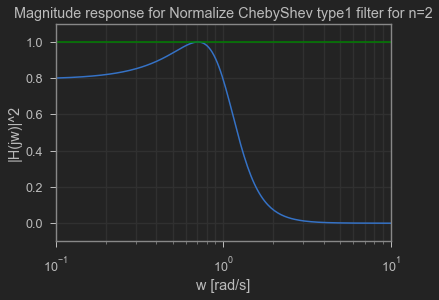

<Figure size 432x288 with 0 Axes>

n = 3
[0.49130668]
[1.         0.98834121 1.23840917 0.49130668]


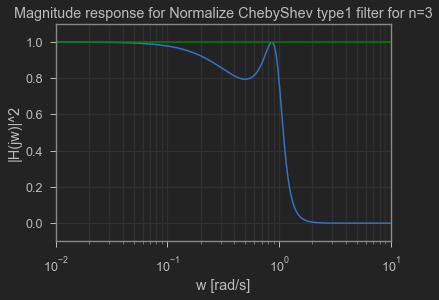

<Figure size 432x288 with 0 Axes>

n = 4
[0.24565334]
[1.         0.95281138 1.45392476 0.74261937 0.27562758]


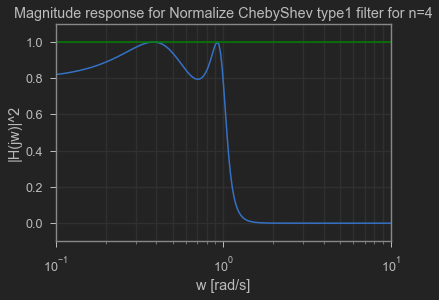

<Figure size 432x288 with 0 Axes>

n = 5
[0.12282667]
[1.         0.93682013 1.68881598 0.97439607 0.58053415 0.12282667]


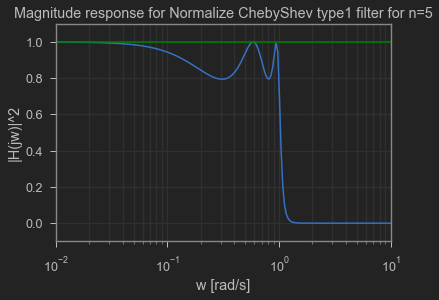

<Figure size 432x288 with 0 Axes>

n = 6
[0.06141334]
[1.         0.92825096 1.93082492 1.20214039 0.93934553 0.30708064
 0.0689069 ]


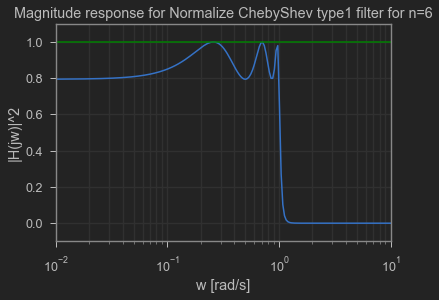

<Figure size 432x288 with 0 Axes>

In [3]:
# Magnitude response for Normalize ChebyShev type I Filter
for i in range(1, 7):
    b, a = sig.cheby1(i, 1, 1, btype='low', analog=True, output='ba')
    print('n = {}'.format(i))
    print(b)
    print(a)
    w, h = sig.freqs(b, a)
    plt.semilogx(w, np.power(abs(h), 2))
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axhline(1, color='green')
    plt.title('Magnitude response for Normalize ChebyShev type1 filter for n={}'.format(i))
    plt.xlabel('w [rad/s]')
    plt.ylabel('|H(jw)|^2')
    plt.show(plt.figure(2))

n = 1
[0.33333333]
[1.         0.33333333]


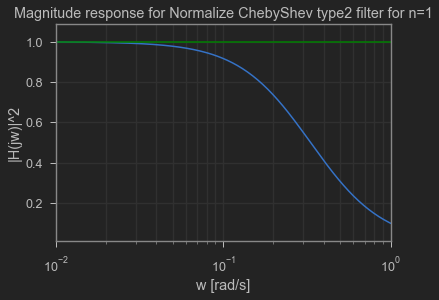

<Figure size 432x288 with 0 Axes>

n = 2
[0.31622777 0.         0.63245553]
[1.         0.93000595 0.63245553]


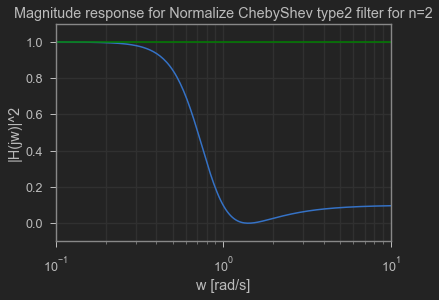

<Figure size 432x288 with 0 Axes>

n = 3
[1.         0.         1.33333333]
[1.         2.10580768 1.717213   1.33333333]


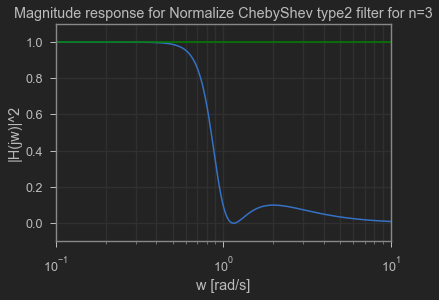

<Figure size 432x288 with 0 Axes>

n = 4
[0.31622777 0.         2.52982213 0.         2.52982213]
[1.         2.698642   4.44133432 3.10991506 2.52982213]


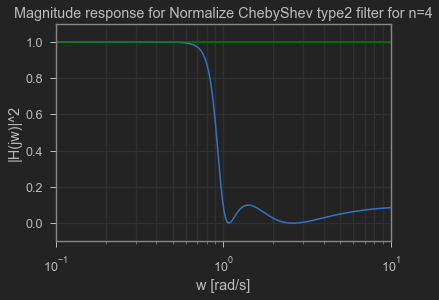

<Figure size 432x288 with 0 Axes>

n = 5
[1.66666667 0.         6.66666667 0.         5.33333333]
[ 1.          4.15384488  7.23832476 10.52615152  6.41621683  5.33333333]


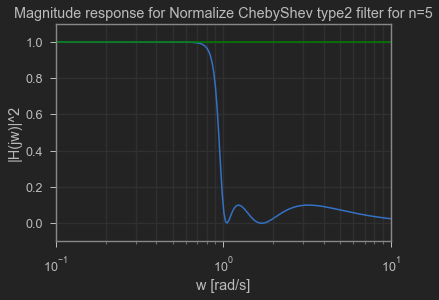

<Figure size 432x288 with 0 Axes>

n = 6
[ 0.31622777  0.          5.69209979  0.         15.17893277  0.
 10.11928851]
[ 1.          4.56362273 12.21332621 16.63470381 22.33184379 12.031822
 10.11928851]


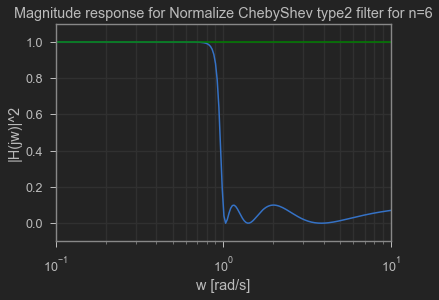

<Figure size 432x288 with 0 Axes>

In [4]:
# Magnitude response for Normalize ChebyShev type II Filter
for i in range(1, 7):
    b, a = sig.cheby2(i, 10, 1, btype='low', analog=True, output='ba')
    print('n = {}'.format(i))
    print(b)
    print(a)
    w, h = sig.freqs(b, a)
    plt.semilogx(w, np.power(abs(h), 2))
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axhline(1, color='green')
    plt.title('Magnitude response for Normalize ChebyShev type2 filter for n={}'.format(i))
    plt.xlabel('w [rad/s]')
    plt.ylabel('|H(jw)|^2')
    plt.show(plt.figure(2))

8
20.0


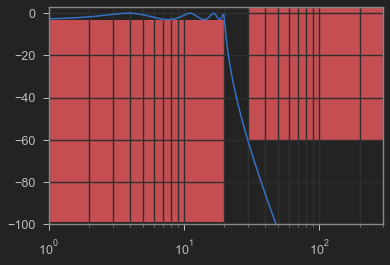

In [5]:
# Simple Example for Chebyshev type I
wpass = 20
wstop = 30
n, ws = sig.cheb1ord(wpass, wstop, 3, 60, analog=True)
b, a = sig.cheby1(n, 3, ws, 'low', True)
w, h = sig.freqs(b, a)
print(n)
print(ws)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.fill([0,wpass,wpass,0],[-3,-3,-99,-99],color='r',lw=0)
plt.fill([wstop,1000,1000,wstop],[-60,-60,100,100],color='r',lw=0)
plt.axis([1, 300, -100, 3])
plt.grid(which='both', axis='both')
plt.show()

8
29.7335145985346


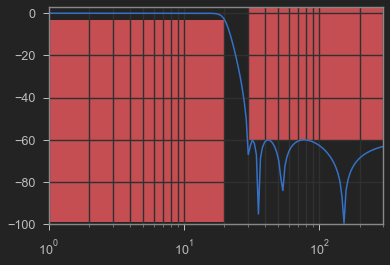

In [6]:
# Simple Example for Chebyshev type II
wpass = 20
wstop = 30
n, ws = sig.cheb2ord(wpass, wstop, 3, 60, analog=True)
b, a = sig.cheby2(n, 60, ws, 'low', True)
w, h = sig.freqs(b, a)
print(n)
print(ws)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.fill([0,wpass,wpass,0],[-3,-3,-99,-99],color='r',lw=0)
plt.fill([wstop,1000,1000,wstop],[-60,-60,100,100],color='r',lw=0)
plt.axis([1, 300, -100, 3])
plt.grid(which='both', axis='both')
plt.show()